# <center>**Práctica 2: Trabajo de Investigación**</center>
## <center>Procesamiento de Imagen, Vídeo y Audio</center>
### <center>Grado en Ciencia e Ingeniería de Datos</center>
### <center>Curso 2022/2023</center>

In [10]:
import skimage.io as io
import scipy as sp
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

### **1. Ejercicio 1: Segmentación de carreteras en imagen aérea de alta resolución**

In [12]:
# cargamos los datos de la carpeta data 
data = io.imread_collection('data/roads/sat/*.tiff')
labels = io.imread_collection('data/roads/gt/*.tif')

#### Preprocesado de las imágenes

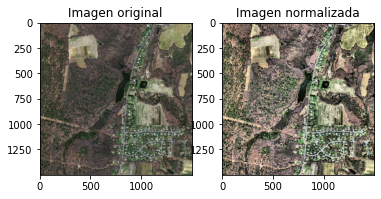

In [14]:
from skimage import exposure

# Normalización de imágenes
norm_data = []
for img in data:
    norm_img = exposure.equalize_adapthist(img, clip_limit=0.03) # Normaliza la imagen usando la corrección de contraste adaptativo
    norm_data.append(norm_img)

# Visualización de una imagen normalizada
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(data[0])
ax1.set_title('Imagen original')
ax2.imshow(norm_data[0])
ax2.set_title('Imagen normalizada')
plt.show()

C:\Users\Administrador\AppData\Local\Temp\ipykernel_10204\1274464637.py:6: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.21. Set `channel_axis=-1` explicitly to silence this warning.
  smooth_img = gaussian(img, sigma=1) # Filtro Gaussiano con sigma=1


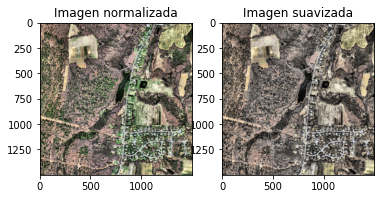

In [15]:
from skimage.filters import gaussian, median

# Eliminación de ruido 
smooth_data = []
for img in norm_data:
    smooth_img = gaussian(img, sigma=1) # Filtro Gaussiano con sigma=1
    smooth_img = median(smooth_img) # Filtro de mediana con tamaño de ventana predeterminado
    smooth_data.append(smooth_img)

# Visualización de una imagen suavizada
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(norm_data[0])
ax1.set_title('Imagen normalizada')
ax2.imshow(smooth_data[0])
ax2.set_title('Imagen suavizada')
plt.show()

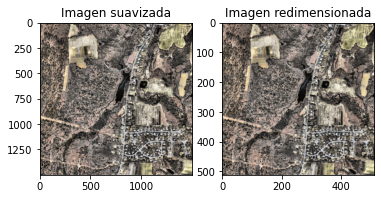

In [16]:
from skimage.transform import resize

# Ajuste de la resolución de las imágenes
resized_data = []
for i in range(len(smooth_data)):
    resized_img = resize(smooth_data[i], (512, 512), anti_aliasing=True)
    resized_data.append(resized_img)

# Visualización de una imagen redimensionada
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(smooth_data[0])
ax1.set_title('Imagen suavizada')
ax2.imshow(resized_data[0])
ax2.set_title('Imagen redimensionada')
plt.show()